In [1]:
import numpy as np
import pandas as pd

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

from sklearn.cross_validation import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import math


Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
np.random.seed(7)

msft_dataset = pd.read_csv('./data/GoldmanSachs.csv')
msft_dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2018-07-11,225.759995,227.250000,225.199997,225.660004,225.660004,2527000
249,2018-07-12,227.639999,227.800003,225.770004,227.220001,227.220001,2223100
250,2018-07-13,226.630005,228.619995,223.929993,226.410004,226.410004,2541500
251,2018-07-16,227.199997,231.440002,226.740005,231.440002,231.440002,3268200
252,2018-07-17,231.479996,233.229996,226.869995,228.567993,228.567993,5334098


In [3]:
msft_dataset.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
msft_dataset['Date'] = pd.to_datetime(msft_dataset['Date'])
msft_dataset['Close'] = pd.to_numeric(msft_dataset['Close'], downcast='float')
msft_dataset.set_index('Date',inplace=True)

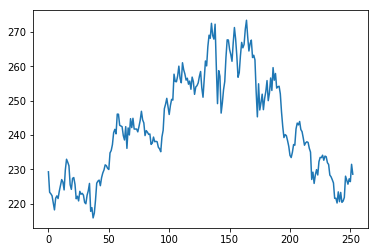

In [5]:
msft_close = msft_dataset['Close']
msft_close = msft_close.values.reshape(len(msft_close), 1)
plt.plot(msft_close)
plt.show()

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
msft_close  = scaler.fit_transform(msft_close)
msftTrain , msftTest = msft_close[0:200], msft_close[200:]


In [7]:
def create_ts(ds, series):
    X, Y =[], []
    for i in range(len(ds)-series - 1):
        item = ds[i:(i+series), 0]
        X.append(item)
        Y.append(ds[i+series, 0])
    return np.array(X), np.array(Y)

series = 7

trainX, trainY = create_ts(msftTrain, series=7)
testX, testY = create_ts(msftTest, series=7)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

model = Sequential()
model.add(LSTM(4, input_shape=(series, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

model.fit(trainX, trainY, epochs=300, batch_size=32)

Epoch 1/300
192/192 [==============================] - 1s 4ms/step - loss: 0.2129
Epoch 2/300
192/192 [==============================] - 0s 305us/step - loss: 0.1895
Epoch 3/300
192/192 [==============================] - 0s 310us/step - loss: 0.1678
Epoch 4/300
192/192 [==============================] - 0s 311us/step - loss: 0.1477
Epoch 5/300
192/192 [==============================] - 0s 318us/step - loss: 0.1298
Epoch 6/300
192/192 [==============================] - 0s 324us/step - loss: 0.1133
Epoch 7/300
192/192 [==============================] - 0s 313us/step - loss: 0.0983
Epoch 8/300
192/192 [==============================] - 0s 314us/step - loss: 0.0862
Epoch 9/300
192/192 [==============================] - 0s 298us/step - loss: 0.0744
Epoch 10/300
192/192 [==============================] - 0s 338us/step - loss: 0.0646
Epoch 11/300
192/192 [==============================] - 0s 318us/step - loss: 0.0564
Epoch 12/300
192/192 [==============================] - 0s 303us/step - loss

192/192 [==============================] - 0s 243us/step - loss: 0.0077
Epoch 98/300
192/192 [==============================] - 0s 270us/step - loss: 0.0076
Epoch 99/300
192/192 [==============================] - 0s 366us/step - loss: 0.0076
Epoch 100/300
192/192 [==============================] - 0s 445us/step - loss: 0.0076
Epoch 101/300
192/192 [==============================] - 0s 474us/step - loss: 0.0076
Epoch 102/300
192/192 [==============================] - 0s 418us/step - loss: 0.0076
Epoch 103/300
192/192 [==============================] - 0s 453us/step - loss: 0.0076
Epoch 104/300
192/192 [==============================] - 0s 308us/step - loss: 0.0076
Epoch 105/300
192/192 [==============================] - 0s 315us/step - loss: 0.0076
Epoch 106/300
192/192 [==============================] - 0s 409us/step - loss: 0.0075
Epoch 107/300
192/192 [==============================] - 0s 403us/step - loss: 0.0075
Epoch 108/300
192/192 [==============================] - 0s 317us/step

192/192 [==============================] - 0s 352us/step - loss: 0.0068
Epoch 193/300
192/192 [==============================] - 0s 284us/step - loss: 0.0068
Epoch 194/300
192/192 [==============================] - 0s 393us/step - loss: 0.0068
Epoch 195/300
192/192 [==============================] - 0s 434us/step - loss: 0.0068
Epoch 196/300
192/192 [==============================] - 0s 441us/step - loss: 0.0068
Epoch 197/300
192/192 [==============================] - 0s 436us/step - loss: 0.0068
Epoch 198/300
192/192 [==============================] - 0s 419us/step - loss: 0.0067
Epoch 199/300
192/192 [==============================] - 0s 321us/step - loss: 0.0067
Epoch 200/300
192/192 [==============================] - 0s 444us/step - loss: 0.0067
Epoch 201/300
192/192 [==============================] - 0s 494us/step - loss: 0.0067
Epoch 202/300
192/192 [==============================] - 0s 513us/step - loss: 0.0067
Epoch 203/300
192/192 [==============================] - 0s 475us/st

192/192 [==============================] - 0s 327us/step - loss: 0.0060
Epoch 288/300
192/192 [==============================] - 0s 376us/step - loss: 0.0061
Epoch 289/300
192/192 [==============================] - 0s 355us/step - loss: 0.0061
Epoch 290/300
192/192 [==============================] - 0s 414us/step - loss: 0.0060
Epoch 291/300
192/192 [==============================] - 0s 346us/step - loss: 0.0061
Epoch 292/300
192/192 [==============================] - 0s 339us/step - loss: 0.0060
Epoch 293/300
192/192 [==============================] - 0s 474us/step - loss: 0.0060
Epoch 294/300
192/192 [==============================] - 0s 390us/step - loss: 0.0060
Epoch 295/300
192/192 [==============================] - 0s 389us/step - loss: 0.0060
Epoch 296/300
192/192 [==============================] - 0s 338us/step - loss: 0.0060
Epoch 297/300
192/192 [==============================] - 0s 398us/step - loss: 0.0060
Epoch 298/300
192/192 [==============================] - 0s 364us/st

Train score: %.2f rmse 4.432133004029763
Test score: %.2f rmse 3.8703650261378564


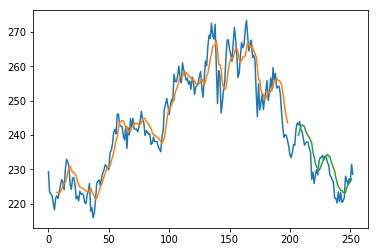

In [8]:
trainPredictions = model.predict(trainX)
testPredictions = model.predict(testX)
#unscale predictions
trainPredictions = scaler.inverse_transform(trainPredictions)
testPredictions = scaler.inverse_transform(testPredictions)
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredictions[:, 0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredictions[:, 0]))
print('Train score: %.2f rmse', trainScore)
print('Test score: %.2f rmse', testScore)

train_plot = np.empty_like(msft_close)
train_plot[:,:] = np.nan
train_plot[series:len(trainPredictions)+series, :] = trainPredictions

test_plot = np.empty_like(msft_close)
test_plot[:,:] = np.nan
test_plot[len(trainPredictions)+(series*2)+1:len(msft_close)-1, :] = testPredictions

#plot on graph
plt.plot(scaler.inverse_transform(msft_close))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()